In [551]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [552]:
data = pd.read_csv('train.csv',index_col=0)

In [293]:
data.head() # take a look

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Load Test data

In [294]:
data_t = pd.read_csv('test.csv',index_col=0) # do no add index, use default index

In [295]:
data_t.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [299]:
data_t.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [296]:
# Combine training and test data
datam = data.append(data_t, ignore_index=True)

/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [297]:
datam.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450


# Explore some data classes

In [298]:
datam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    891 non-null float64
Ticket      1309 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 112.6+ KB


## The categories with missing values are: 
#### *<font color=blue>Age, Cabin(cabin number), Embarked(port where passenger embark)</font>*
#### We can explore these categories later to address how to fill in the missing values

### Get some summary of each column, know the values and types of each column
### Take out target column *<font color=blue>(Survived)* , check the proportion of survival

In [5]:
target = data['Survived']

In [550]:
print(target.describe())
print("survivors :",target.value_counts()[1]," people, deceased :",target.value_counts()[0]," people")
print(target.value_counts()/len(data)*100,"%")

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64
survivors : 342  people, deceased : 549  people
0    61.616162
1    38.383838
Name: Survived, dtype: float64 %


### Survival is 38%, 342 out of total 891 passengers

In [228]:
data.pop('Survived')
for item in data.columns:    # data overall display
    print(data[item].describe())
    print(data[item].value_counts())

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64
3    491
1    216
2    184
Name: Pclass, dtype: int64
count                  891
unique                 891
top       Ali, Mr. William
freq                     1
Name: Name, dtype: object
Ali, Mr. William                                     1
Ostby, Mr. Engelhart Cornelius                       1
Petroff, Mr. Pastcho ("Pentcho")                     1
Lovell, Mr. John Hall ("Henry")                      1
Giglio, Mr. Victor                                   1
Ohman, Miss. Velin                                   1
Hunt, Mr. George Henry                               1
de Pelsmaeker, Mr. Alfons                            1
Moutal, Mr. Rahamin Haim                             1
Goldenberg, Mr. Samuel L                             1
Heikkinen, Miss. Laina                               1
Dahl, Mr. Karl Edw

# Garphical visualization of selected columns to explore the features

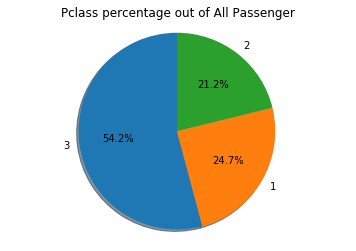

In [300]:
# Pclass
perc=datam['Pclass'].value_counts()/len(data)*100
label=datam['Pclass'].value_counts().index.values
#print(label)
fig1, ax1 = plt.subplots()
ax1.pie(perc, labels=label, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Pclass percentage out of All Passenger')

plt.show()

Text(0.5, 1.0, 'Pclass survival percentage %')

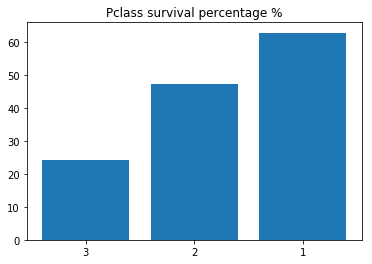

In [9]:
# check the Pclass out of survivors
# it is more meaningful to check the percentage of survival (survival rate) from each class
sub_ind=target==1
sub_df=data[sub_ind]
# replot to bar graph
totl = data['Pclass'].value_counts()
part=sub_df['Pclass'].value_counts()
perc=[None]*3
for i in range(1,4):
    perc[i-1]=part[i]/totl[i]*100

label=sub_df['Pclass'].value_counts().index.values
fig1, ax1 = plt.subplots()
ax1.bar([3,2,1],perc)
plt.xticks([3,2,1],[1,2,3])
ax1.set_title('Pclass survival percentage %')

#### apparently passengers who boarded cabin class with higher rank are more likely to survive

['male' 'female']


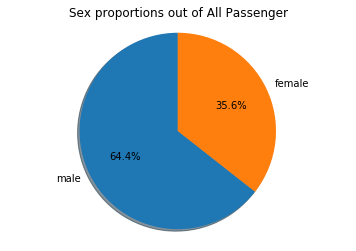

In [301]:
# Sex
perc=datam['Sex'].value_counts(sort=True)/len(data)*100
label=datam['Sex'].value_counts(sort=True).index.values
#print(label)
print(perc.index.values)
fig1, ax1 = plt.subplots()
ax1.pie(perc, labels=label, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Sex proportions out of All Passenger')

plt.show()

male survival precentage:  18.890814558058924 %
female survival precentage:  74.20382165605095 %


Text(0.5, 1.0, 'Gender survival percentage')

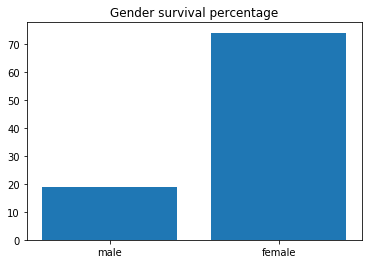

In [30]:
# check the Sex out of survivors
# it is more meaningful to check the percentage of survival (survival rate) from each gender
# replot to bar graph
totl = data['Sex'].value_counts(sort=True)
part= sub_df['Sex'].value_counts(sort=True)
#print(part.index)
#print(part[0])
#print(totl.index.values,totl[0],totl[1])
#print(part.index.values,part[0],part[1])
perc=[None]*2
i=0
perc[0]=part[1]/totl[0]*100
perc[1]=part[0]/totl[1]*100

print("male survival precentage: ",perc[0],"%")
print("female survival precentage: ",perc[1],"%")
fig1, ax1 = plt.subplots()
ax1.bar([1,2],perc)
plt.xticks([1,2],['male','female'])
ax1.set_title('Gender survival percentage')

### It is apparent that the female has much higher survival rate than male. About 4 times more likely to survive.

In [302]:
#Age -- This column contains null values
age_valid = datam[datam.Age.notnull()]
print(age_valid.Age.describe())

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64


Text(0.5, 1.0, 'Age distribution')

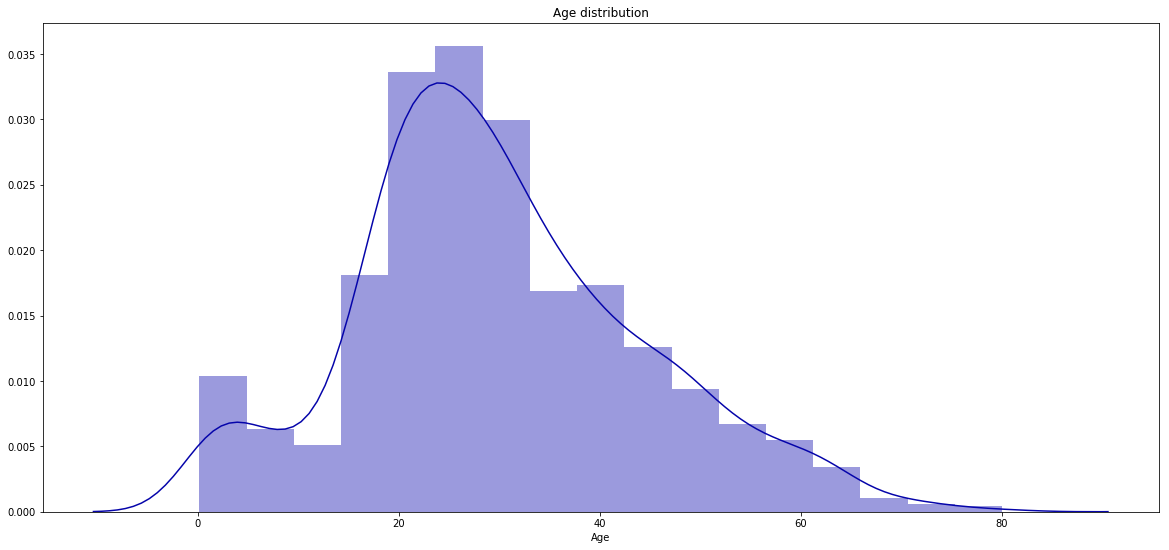

In [303]:
plt.figure(figsize=(20,9))
ax=sns.distplot(age_valid.Age,bins=17,color='#0504aa',norm_hist=False)
ax.set_title("Age distribution")

#### Children age 0-15 seem to have some weird distribution(lacking number), it may indicate that the age reported in this range is not fully correct. Also, there are 0.XX age for babies(not understanding how their ages were reported)

In [304]:
for age in age_valid.Age.values: # show babies ages
    if age<1:
        print(age) 

0.83
0.92
0.75
0.75
0.67
0.42
0.83
0.33
0.92
0.75
0.83
0.17


## check on the missing ages: 
#### (1)check the survival rate on the missing ages row and valid ages row

In [312]:
sub_ind0=target==0  #first check on deceased population
sub_df=data[sub_ind0]
age_valid=sub_df.Age.notnull()
print(age_valid.describe())
print("Total number deceased:",len(sub_df))
print("Percentage missing age record:",424/len(sub_df)*100,"%")

count      549
unique       2
top       True
freq       424
Name: Age, dtype: object
Total number deceased: 549
Percentage missing age record: 77.23132969034609 %


In [176]:
sub_df=data[sub_ind]
age_valid=sub_df.Age.notnull()
print(age_valid.describe())
print("Total number deceased:",len(sub_df))
print("Percentage missing age record:",290/len(sub_df)*100,"%")

count      342
unique       2
top       True
freq       290
Name: Age, dtype: object
Total number deceased: 342
Percentage missing age record: 84.7953216374269 %


#### Based on the percentage of age records in deceased and survived, there seems not to be a reason that the missing age record is due to not recording the deceased.

In [305]:
#Second, check on cabin class. See if there is a relation between cabin class and missing age record
sub_ind1=datam.Pclass==1  #first class population
sub_df=datam[sub_ind1]
age_valid=sub_df.Age.notnull()
print(age_valid.describe())
print("Total number of 1st class:",len(sub_df))
print("Missing Age in 1st class:",216-186)
print("Percentage missing age record:",(216-186)/len(sub_df)*100,"%")
sub_ind2=datam.Pclass==2  #2nd class population
sub_df=datam[sub_ind2]
age_valid=sub_df.Age.notnull()
print(age_valid.describe())
print("Total number of 2nd class:",len(sub_df))
print("Missing Age in 2nd class:",184-173)
print("Percentage missing age record:",(184-173)/len(sub_df)*100,"%")
sub_ind3=datam.Pclass==3  #3rd class population
sub_df=datam[sub_ind3]
age_valid=sub_df.Age.notnull()
print(age_valid.describe())
print("Total number of 3rd class:",len(sub_df))
print("Missing Age in 3rd class:",491-355)
print("Percentage missing age record:",(491-355)/len(sub_df)*100,"%")

count      323
unique       2
top       True
freq       284
Name: Age, dtype: object
Total number of 1st class: 323
Missing Age in 1st class: 30
Percentage missing age record: 9.287925696594428 %
count      277
unique       2
top       True
freq       261
Name: Age, dtype: object
Total number of 2nd class: 277
Missing Age in 2nd class: 11
Percentage missing age record: 3.9711191335740073 %
count      709
unique       2
top       True
freq       501
Name: Age, dtype: object
Total number of 3rd class: 709
Missing Age in 3rd class: 136
Percentage missing age record: 19.18194640338505 %


### Most missing ages record came from 3rd class passengers.

In [307]:
#plot percentage of the missing ages
totl = len(datam)-sum(datam.Age.notnull())
mis_1st = len(datam.loc[datam['Pclass']==1])-sum(datam.loc[datam['Pclass']==1].Age.notnull())
mis_2nd = len(datam.loc[datam['Pclass']==2])-sum(datam.loc[datam['Pclass']==2].Age.notnull())
mis_3rd = len(datam.loc[datam['Pclass']==3])-sum(datam.loc[datam['Pclass']==3].Age.notnull())
perc = np.divide([mis_3rd,mis_1st,mis_2nd],totl)*100
label=['3rd class','2nd class','1st class']

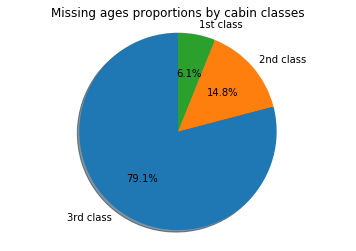

In [308]:
fig1, ax1 = plt.subplots()
ax1.pie(perc, labels=label, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Missing ages proportions by cabin classes')

plt.show()

#### Since the missing Age population most lies in the 3rd class cabins, take a look at the 3rd class age distribution

In [309]:
pc3Age = datam.loc[datam['Pclass']==3].Age
print(pc3Age.describe())

count    501.000000
mean      24.816367
std       11.958202
min        0.170000
25%       18.000000
50%       24.000000
75%       32.000000
max       74.000000
Name: Age, dtype: float64


/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/miniconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/miniconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


Text(0.5, 1.0, 'Age distribution of 3rd class passengers')

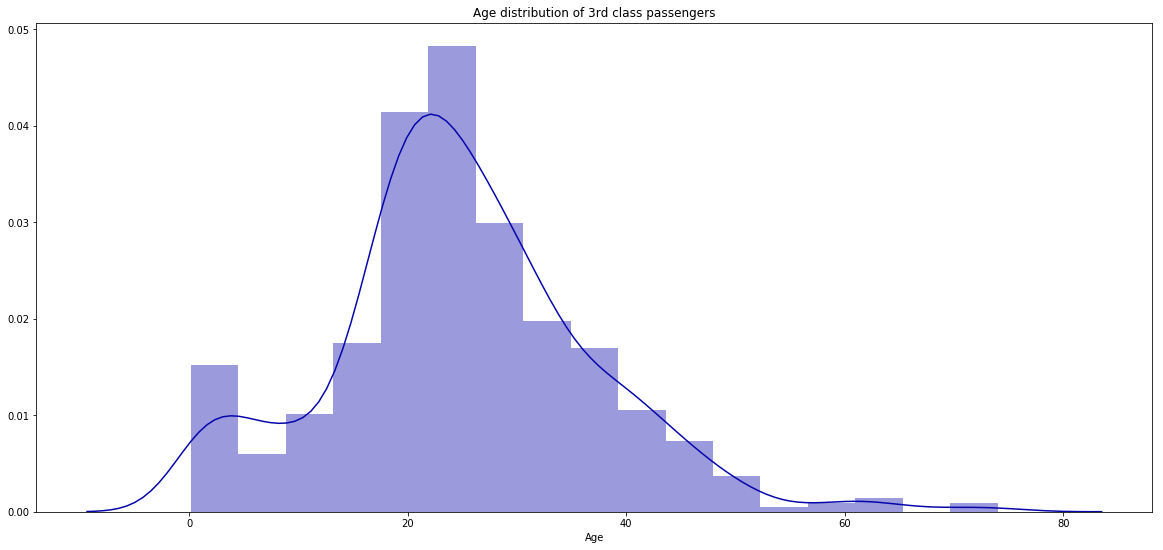

In [310]:
plt.figure(figsize=(20,9))
ax=sns.distplot(pc3Age,bins=17,color='#0504aa',norm_hist=False)
ax.set_title("Age distribution of 3rd class passengers")

#### The 3rd class age distribution is also binomial looking, but the number for 20-25yrs old is apparently very high. I would tend to fill in missing age based on *<font color=blue>"Mode"*(first guess)

In [311]:
from collections import Counter
pc3Agef = Counter(pc3Age[pc3Age.notnull()].values)
#print(pc3Agef.most_common())   # Returns all unique items and their counts
print("MODE number of the ages of passengers from 3rd class:", pc3Agef.most_common(1)[0][0])

MODE number of the ages of passengers from 3rd class: 22.0


### check different age ranges and the survival rate

In [253]:
bins = np.linspace(0,80,17)
div = 5
counts=[0]*len(bins)
counts_tol = [0]*len(bins)
sub_df = data[sub_ind] # survivors
for i,item in enumerate(bins):
    for rows in sub_df.iterrows():
        if (rows[1].Age > item) and (rows[1].Age <= item+5):
            counts[i]+=1

for i,item in enumerate(bins):
    for rows in data.iterrows():
        if (rows[1].Age > item) and (rows[1].Age <= item+5):
            counts_tol[i]+=1

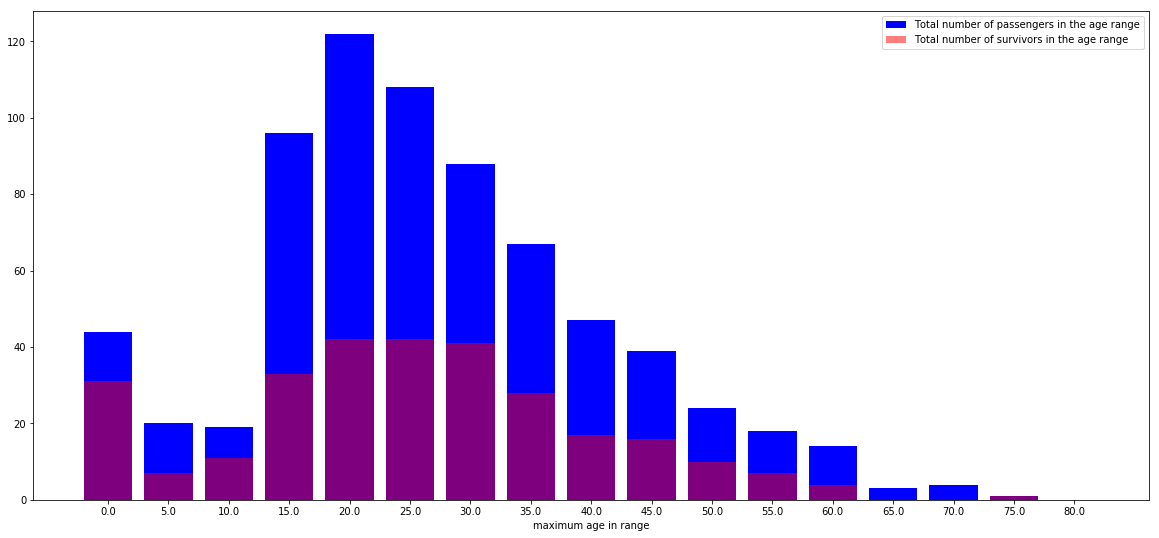

In [266]:
plt.figure(figsize=(20,9))
indices = np.arange(len(bins))
plt.bar(indices, counts_tol, width=.8, 
        color='b', label='Total number of passengers in the age range')
plt.bar(indices, counts, 
        width=.8, color='r', alpha=0.5, label='Total number of survivors in the age range')

plt.xticks(indices, 
           bins )
plt.xlabel('maximum age in range')
plt.legend()
plt.show()

### plot by percentage

In [272]:
perc = [counts[i]/counts_tol[i]*100 for i in range(len(counts)) if counts_tol[i]!=0]+[0]

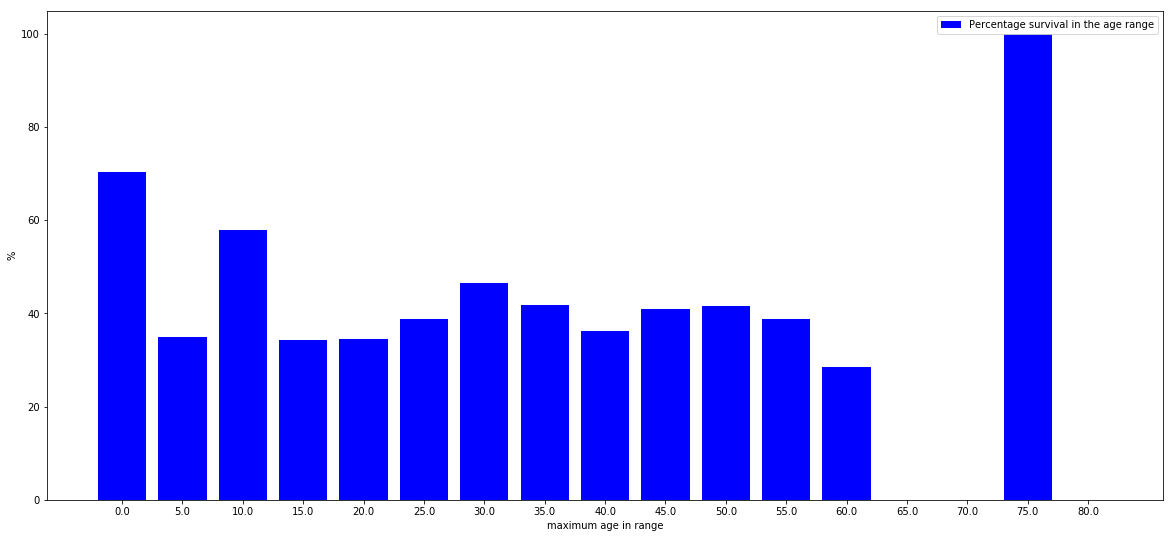

In [276]:
plt.figure(figsize=(20,9))
indices = np.arange(len(bins))
plt.bar(indices, perc, width=.8, color='b', label='Percentage survival in the age range')
plt.xticks(indices, bins)
plt.xlabel('maximum age in range')
plt.ylabel('%')
plt.legend()
plt.show()

### There seems to be a slight trend of decreasing survival rate when age increases, however, the trend is not so apparent and the elderly population is probably too small to validate that trend. However, *<font color=blue>infant* is definitely protected and therefore has higher survival rate. 

In [368]:
#SibSp
sub_df = datam['SibSp']
catSibsp=sub_df.value_counts()
print(catSibsp)

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64


In [337]:
catSibsp.index

Int64Index([0, 1, 2, 4, 3, 8, 5], dtype='int64')

### Plot survival counts based on sibling numbers

### Plot survival rate based on sibling numbers

In [357]:
Sibgrp=sub_df.groupby('SibSp')
SibgrpAll= data.groupby('SibSp')
#catSibSp = data.SibSp.value_counts()

In [374]:
for cat in sorted(catSibSp.index):
    if cat<5:
        print("survival percentage for ppl who has ",cat, "siblings:",(len(SibgrpAll.get_group(cat))-len(Sibgrp.get_group(cat)))/len(SibgrpAll.get_group(cat))*100,"%")
    else:
        print("survival percentage for ppl who has ",cat, "siblings: 0%")

survival percentage for ppl who has  0 siblings: 65.46052631578947 %
survival percentage for ppl who has  1 siblings: 46.411483253588514 %
survival percentage for ppl who has  2 siblings: 53.57142857142857 %
survival percentage for ppl who has  3 siblings: 75.0 %
survival percentage for ppl who has  4 siblings: 83.33333333333334 %
survival percentage for ppl who has  5 siblings: 0%
survival percentage for ppl who has  8 siblings: 0%


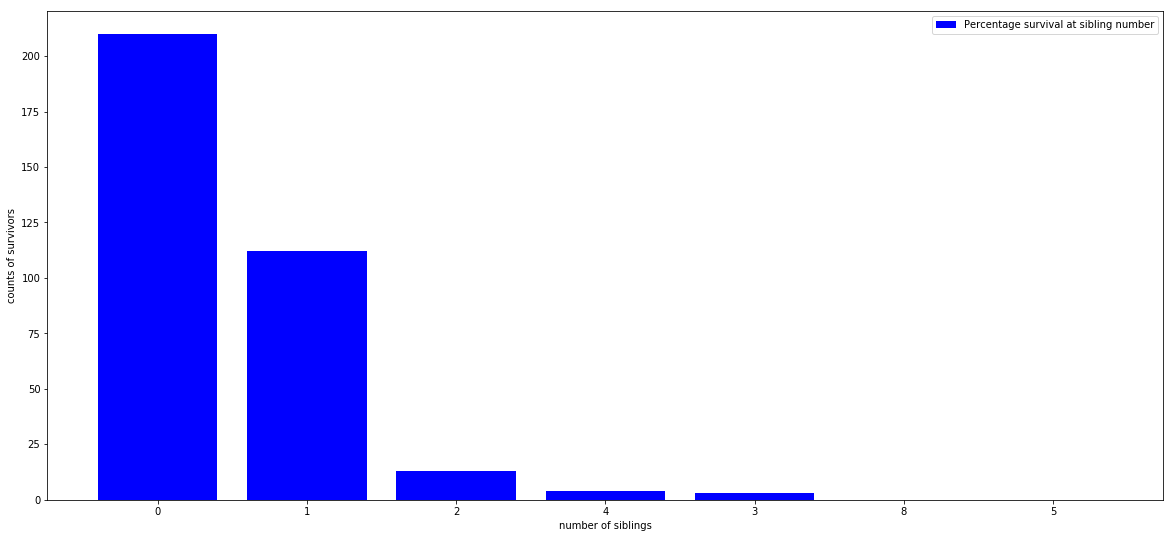

Text(0.5, 1.0, 'Sibling number distribution of survivors')

In [402]:
barp=[0]*len(catSibSp.index)
indices = np.arange(len(barp))
for i,cat in enumerate(sorted(catSibSp.index)):
    if cat<5:
        barp[i]=len(Sibgrp.get_group(cat))
    else: barp[i]=0
plt.figure(figsize=(20,9))
plt.bar(indices, barp, width=.8, color='b', label='Percentage survival at sibling number')
plt.xticks(indices, catSibsp.index)
plt.xlabel('number of siblings')
plt.ylabel('counts of survivors')
plt.legend()
plt.show()
ax.set_title("Sibling number distribution of survivors")

### There seems to be higher survival rate if one has siblings more than 3
#### Bar graph showing only number/frequency of survivors is not so much a good representation to show relationship between number of siblings and survival.

In [384]:
# Parch
sub_df = datam['Parch']
catParch=sub_df.value_counts()
print(catParch)
print(catParch.index)

0    1002
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: Parch, dtype: int64
Int64Index([0, 1, 2, 3, 5, 4, 9, 6], dtype='int64')


In [387]:
sub_df = data[[not x for x in sub_ind0]]
Prcgrp=sub_df.groupby('Parch')
PrcgrpAll= data.groupby('Parch')

In [392]:
for cat in sorted(catParch.index):
    if cat not in [4,5,6,9]:
        print("survival percentage for ppl who has ",cat, "relatives:",(len(PrcgrpAll.get_group(cat))-len(Prcgrp.get_group(cat)))/len(PrcgrpAll.get_group(cat))*100,"%")
    #else:
        #print("survival percentage for ppl who has ",cat, "siblings: 0%")

survival percentage for ppl who has  0 relatives: 65.63421828908554 %
survival percentage for ppl who has  1 relatives: 44.91525423728814 %
survival percentage for ppl who has  2 relatives: 50.0 %
survival percentage for ppl who has  3 relatives: 40.0 %


### There does not seem to be higher survival rate if one has more relative on board

In [404]:
#Fare
sub_df = datam['Fare']
sub_df.describe()
# make bins and divide fare into different ranges


count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [532]:
bins = np.linspace(0,512,17)
# create counts
counts=[0]*len(bins)
for i,item in enumerate(bins):
    for rows in data.iterrows():
        if (rows[1].Fare > item) and (rows[1].Fare <= item+32):
            counts[i]+=1

In [428]:
counts

[665, 93, 65, 15, 16, 2, 5, 6, 6, 0, 0, 0, 0, 0, 0, 0, 3]

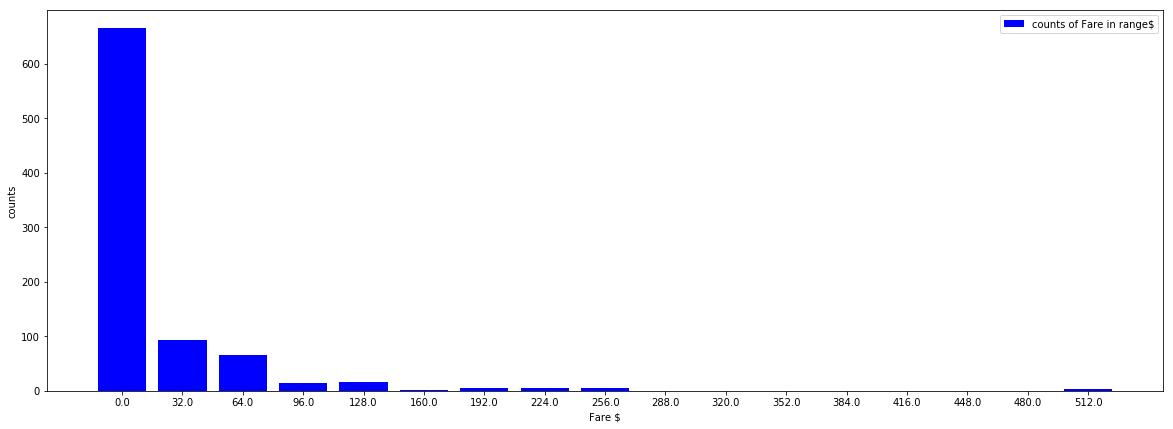

Text(0.5, 1.0, 'Fare distribution')

In [436]:
indices= np.arange(len(counts))
plt.figure(figsize=(20,7))
plt.bar(indices, counts, width=.8, color='b', label='counts of Fare in range$')
plt.xticks(indices, bins)
plt.legend()
plt.xlabel('Fare $')
plt.ylabel('counts')
plt.show()
ax.set_title("Fare distribution")

### Survival rate and Fare price relationship

In [541]:
counts_surv=[0]*len(bins)
for i,item in enumerate(bins):
    for rows in data.iterrows():
        if (rows[1].Fare > item) and (rows[1].Fare <= item+32) and (rows[1].Survived ==1):
            counts_surv[i]+=1
surv_perc_fr = [0]*len(bins)
for i in range(len(bins)):
    if counts[i] is not 0:
        surv_perc_fr[i]=counts_surv[i]/counts[i]*100
    else:
        surv_perc_fr[i]=0
            

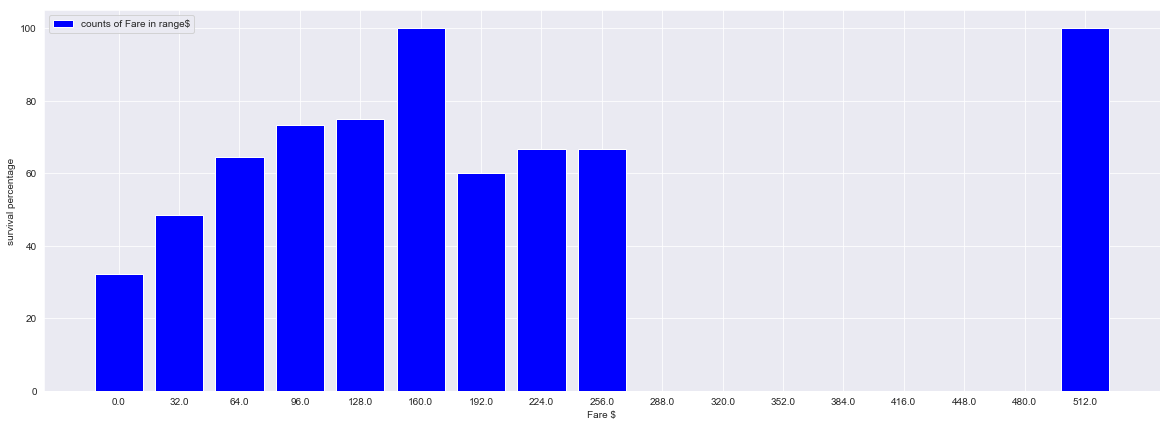

Text(0.5, 1.0, 'Survival rate in Fare range')

In [543]:
indices= np.arange(len(counts))
plt.figure(figsize=(20,7))
plt.bar(indices,surv_perc_fr, width=.8, color='b', label='counts of Fare in range$')
plt.xticks(indices, bins)
plt.legend()
plt.xlabel('Fare $')
plt.ylabel('survival percentage')
plt.show()
ax.set_title("Survival rate in Fare range")

### check the relationship between Fare price and class

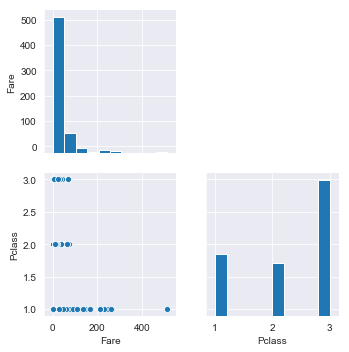

In [439]:
cols =['Fare','Pclass']
sns.set_style("darkgrid")
g=sns.pairplot(datam[cols])
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

#### Fare price is directly related to cabin class.Only 1st class would cost more than 100$. For the 1 missing Fare record, we can fill in the average fare of the matching class.

In [446]:
# Cabin
# Cabin column contains more Null values, needs to do trimming 
datac= datam[datam.Cabin.notnull()]

In [525]:
import re
from statistics import mode,mean
newcabn=[]
newcabc=[]
for row in datac.iterrows():
    splt=re.split('(\d+)',row[1].Cabin)
    # set aside characters and number
    if '' in splt:splt.pop(-1)
    if len(splt)>2:
        print("multiple cabins' records:",splt)
        print("checking multiple records with Sibling/relative numbers ",row[1].SibSp,row[1].Parch)
        tmp = [int(x) for x in splt[1:2]]
        splt[1]=mean(tmp)
    if len(splt)==1: splt+=[0]
    
    newcabn+=[splt[1]]
    newcabc+=[splt[0]]

multiple cabins' records: ['C', '23', ' C', '25', ' C', '27']
checking multiple records with Sibling/relative numbers  3 2
multiple cabins' records: ['C', '23', ' C', '25', ' C', '27']
checking multiple records with Sibling/relative numbers  3 2
multiple cabins' records: ['D', '10', ' D', '12']
checking multiple records with Sibling/relative numbers  0 1
multiple cabins' records: ['B', '58', ' B', '60']
checking multiple records with Sibling/relative numbers  0 1
multiple cabins' records: ['C', '22', ' C', '26']
checking multiple records with Sibling/relative numbers  1 2
multiple cabins' records: ['B', '58', ' B', '60']
checking multiple records with Sibling/relative numbers  0 1
multiple cabins' records: ['C', '22', ' C', '26']
checking multiple records with Sibling/relative numbers  1 2
multiple cabins' records: ['B', '57', ' B', '59', ' B', '63', ' B', '66']
checking multiple records with Sibling/relative numbers  2 2
multiple cabins' records: ['C', '23', ' C', '25', ' C', '27']
ch

In [529]:
print("total cabin records:",len(datac),". total unique cabin records:",len(set(datac.Cabin.values)))

total cabin records: 295 . total unique cabin records: 186


### We can see that multiple cabins may be registered under several persons, who are likely within a family or board as friends. These cabin numbers may be close by.

In [495]:
# add column of Cabin class
datac['CabinCls']=newcabc
datac['CabinNum']=newcabn

/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [497]:
# Visualize Cabin survival rate
sub_df = datac[datac['Survived']==1]
Cbgrp=sub_df.groupby('CabinCls')
CbgrpAll= datac.groupby('CabinCls')

In [514]:
catCbgrp = datac.CabinCls.value_counts()
saveCb_perc=[0]*len(catCbgrp)
for i,cat in enumerate(sorted(catCbgrp.index)):
    if cat in ['F G','T']: 
        saveCb_perc[i]=0
    else:    
        saveCb_perc[i]=(len(CbgrpAll.get_group(cat))-len(Cbgrp.get_group(cat)))/len(CbgrpAll.get_group(cat))*100
    print("survival percentage for ppl who is in ",cat, "cabin class:",saveCb_perc[i],"%")

survival percentage for ppl who is in  A cabin class: 68.18181818181817 %
survival percentage for ppl who is in  B cabin class: 46.15384615384615 %
survival percentage for ppl who is in  C cabin class: 62.76595744680851 %
survival percentage for ppl who is in  D cabin class: 45.65217391304348 %
survival percentage for ppl who is in  E cabin class: 41.46341463414634 %
survival percentage for ppl who is in  F cabin class: 50.0 %
survival percentage for ppl who is in  F E cabin class: 66.66666666666666 %
survival percentage for ppl who is in  F G cabin class: 0 %
survival percentage for ppl who is in  G cabin class: 60.0 %
survival percentage for ppl who is in  T cabin class: 0 %


Text(0, 0.5, '%')

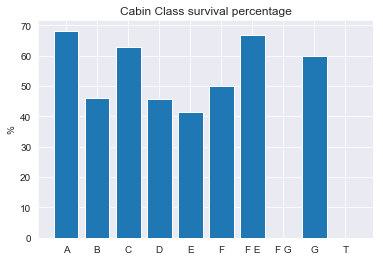

In [518]:
fig1, ax1 = plt.subplots()
ticks=[x for x in range(10)]
ax1.bar(ticks,saveCb_perc)
plt.xticks(ticks,['A','B','C','D','E','F','F E','F G','G','T'])
ax1.set_title('Cabin Class survival percentage')
plt.ylabel('%')

['S' 'C' 'Q']


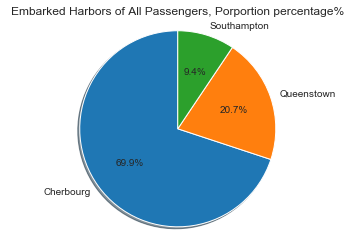

In [545]:
# Embark harbor
perc=datam['Embarked'].value_counts(sort=True)/len(data)*100
label=datam['Embarked'].value_counts(sort=True).index.values
#print(label)
print(perc.index.values)
fig1, ax1 = plt.subplots()
ax1.pie(perc, labels=['Cherbourg', 'Queenstown', 'Southampton'], autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Embarked Harbors of All Passengers, Porportion percentage%')

plt.show()


### Survival rate based on 3 harbors

Index(['S', 'C', 'Q'], dtype='object')
S-port survival precentage:  33.69565217391305 %
C-port survival precentage:  55.35714285714286 %
Q-port survival precentage:  38.961038961038966 %


Text(0, 0.5, '%')

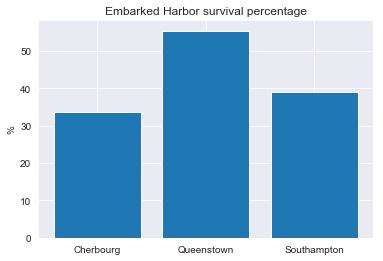

In [549]:
sub_ind=target==1
sub_df=data[sub_ind]
totl = data['Embarked'].value_counts(sort=True)
part= sub_df['Embarked'].value_counts(sort=True)
print(part.index)
#print(part[0])
#print(totl.index.values,totl[0],totl[1])
#print(part.index.values,part[0],part[1])
perc=[None]*3
i=0
perc[0]=part[0]/totl[0]*100
perc[1]=part[1]/totl[1]*100
perc[2]=part[2]/totl[2]*100

print("S-port survival precentage: ",perc[0],"%")
print("C-port survival precentage: ",perc[1],"%")
print("Q-port survival precentage: ",perc[2],"%")
fig1, ax1 = plt.subplots()
ax1.bar([1,2,3],perc)
plt.xticks([1,2,3],['Cherbourg', 'Queenstown', 'Southampton'])
ax1.set_title('Embarked Harbor survival percentage')
plt.ylabel('%')

### The Embarked Harbor is pretty indicative of whether passenger will survive. Q-port passengers are more likely to survive.